<a href="https://colab.research.google.com/github/Renan-LS/AZURE---DataPipeline---OlistBrazilian-E_Commerce/blob/main/E_gov_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **PROJETO: Como aumento do PIB e gastos do governo impactam os setores de saúde e educação?**




**Definição do problema:**


O papel do governo no crescimento econômico tem sido um problema desde há muito
tempo, com a percepção de que, para um desenvolvimento sustentável e uma produção
eficiente, o papel do governo nas políticas econômicas deve ser reduzido.

Dado este cenário fiscal, é necessário identificar a relação entre o PIB (Produto InternoBruto) e as despesas do governo nos setores de saúde e educação e como se relacionam com o crescimento do PIB na economia de um país.




Para este trabalho não vamos considerar um país específico a fim de evitar qualquer tipo de polêmica ou viés. Nosso objetivo aqui é estudar e aplicar  análise de dados. Portanto, este projeto se aplica a qualquer país.

**Principais objetivos:**

	1. Em que ano o país teve um alto crescimento do PIB Per Capita?
	2. Qual ano teve as maiores despesas com saúde?
	3. Qual ano teve os maiores gastos com educação?
	4. Como a receita do governo se correlaciona com a despesa do governo?
	5. Como a educação e a saúde se correlacionam com o crescimento do PIB?
	6. Como os gastos do governo com educação e saúde afetam o crescimento do PIB?
	7. Com base na análise quais são as recomendações aos governantes e gestores?





**Fonte de dados:**


https://data.worldbank.org/?intcid=ecr_hp_BeltD_en_exta

**Dicionário de dados:**

- `ano_coleta` = Ano da coleta dos dados
- `despesas_educ_percent` = Despesas com educação secundária como uma porcentagem das despesas do governo
- `despesas_saude_per_capita` = Despesas atuais com saúde per capita na taxa atual em dólares dos EUA
- `despesas_educ_total` = Despesas do governo com educação, total como uma porcentagem das despesas do governo
- `despesas_saude_%pib` = Despesas atuais com saúde como uma porcentagem do PIB
- `receita_trib_%pib` = Receita tributária como porcentagem do PIB
- `receita_excl_doa_%pib` = Receita excluindo doações como porcentagem do PIB
- `ibrd_e_ida` = Empréstimos do BIRD e créditos da AID como DOD, US `$` atuais
- `pop_cresc_anual%` = Crecimento populacional como porcentagem anual
- `pib_cresc_per_capita_%pib` = Crescimento do PIB per capita como porcentagem anual
- `pib_deflator` = Deflator do PIB, ano base varia por país
- `domestic_saude_despesas_%pib` = Despesas domesticas do governo geral com saúde como uma porcentagem do PIB
- `pib_cresc_anual%` = Crescimento do PIB como uma porcentagem anual
- `pib_cor_us$` = PIB em US `$` correntes
- `despesa_nac_bruta_%pib` = Despesa nacional bruta como uma porcentagem do PIB
- `pib_moeda_local` = PIB em moeda local

## Importação das bibliotecas utilizadas no projeto

In [37]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn
from sklearn.linear_model import LinearRegression

## Carregamento e leitura dos dados

In [38]:
#leitura do arquivo .xlsx e armazenamento do dataset na variável dados_egov
dados_egov = pd.read_excel('/content/dataset.xlsx')

In [39]:
#visualização dos dados
dados_egov.head()

,ano_coleta,despesas_educ_percent,despesas_saude_per_capita,despesas_educ_total,despesas_saude_%pib,receita_trib_%pib,receita_excl_doa_%pib,ibrd_e_ida,pop_cresc_anual%,pib_cresc_per_capita_%pib,pib_deflator,domestic_saude_despesas_%pib,pib_cresc_anual%,pib_cor_us$,despesa_nac_bruta_%pib,pib_moeda_local
0,2003,20.85074,25.437891,24.98009,5.169123,NaN,NaN,2.741964e+09,2.709600,0.180864,51.824235,1.488423,2.932476,1.490452e+10,111.732648,1131782000000
1,2004,23.40954,27.526983,26.66815,5.344949,NaN,NaN,2.882726e+09,2.720796,2.283178,55.517666,1.416008,5.104300,1.609534e+10,110.347249,1274329000000
2,2005,NaN,30.960957,27.46934,5.314364,NaN,NaN,2.663224e+09,2.739229,3.045012,58.237838,1.482691,5.906666,1.873790e+10,110.429285,1415725000000
3,2006,21.67777,40.938290,25.08140,5.873449,NaN,NaN,2.764089e+09,2.757907,3.576204,71.941278,1.458456,6.472494,2.582552e+10,109.212364,1862041000000
4,2007,NaN,50.321873,NaN,5.997067,NaN,NaN,2.968119e+09,2.768560,3.933078,77.789734,1.556385,6.850730,3.195820e+10,109.941251,2151349000000


## Análise Exploratória

In [40]:
# tipos dos atributos
dados_egov.dtypes

ano_coleta                        int64
despesas_educ_percent           float64
despesas_saude_per_capita       float64
despesas_educ_total             float64
despesas_saude_%pib             float64
receita_trib_%pib               float64
receita_excl_doa_%pib           float64
ibrd_e_ida                      float64
pop_cresc_anual%                float64
pib_cresc_per_capita_%pib       float64
pib_deflator                    float64
domestic_saude_despesas_%pib    float64
pib_cresc_anual%                float64
pib_cor_us$                     float64
despesa_nac_bruta_%pib          float64
pib_moeda_local                   int64
dtype: object

In [41]:
# Descrição estatistica do dataset
dados_egov.describe()

,ano_coleta,despesas_educ_percent,despesas_saude_per_capita,despesas_educ_total,despesas_saude_%pib,receita_trib_%pib,receita_excl_doa_%pib,ibrd_e_ida,pop_cresc_anual%,pib_cresc_per_capita_%pib,pib_deflator,domestic_saude_despesas_%pib,pib_cresc_anual%,pib_cor_us$,despesa_nac_bruta_%pib,pib_moeda_local
count,17.000000,8.000000,15.000000,13.000000,15.000000,5.000000,5.000000,1.600000e+01,17.000000,17.000000,17.000000,15.000000,17.000000,1.700000e+01,17.000000,1.700000e+01
mean,2011.000000,34.776599,55.265036,20.844645,5.555868,16.008023,21.028661,3.667159e+09,2.606996,2.539702,117.186747,1.754343,5.247425,4.851720e+10,112.318030,4.387753e+12
std,5.049752,10.632141,17.077696,3.828826,0.412144,0.677579,0.944677,9.532678e+08,0.172462,1.798253,46.934509,0.249802,1.809246,2.477595e+10,2.112360,2.776122e+12
min,2003.000000,20.850740,25.437891,16.664660,4.802543,15.085142,19.620423,2.663224e+09,2.271902,-2.503373,51.824235,1.416008,0.232283,1.490452e+10,109.212364,1.131782e+12
25%,2007.000000,22.976598,45.630081,17.708700,5.266875,15.637825,20.616187,2.946771e+09,2.491937,2.283178,77.789734,1.522404,4.805697,3.195820e+10,110.429285,2.151349e+12
50%,2011.000000,41.763410,57.387424,19.252830,5.519421,16.183533,21.199592,3.313021e+09,2.693733,3.045012,113.111372,1.771546,5.718507,4.195343e+10,112.164729,3.725918e+12
75%,2015.000000,42.682555,69.282478,24.980090,5.935258,16.256635,21.738908,4.244785e+09,2.739229,3.346252,154.710423,1.950641,6.108264,6.400775e+10,114.066709,6.284185e+12
max,2019.000000,43.124180,76.610321,27.469340,6.116753,16.876979,21.968194,5.801797e+09,2.768560,5.494077,192.904792,2.148430,8.405699,9.550309e+10,116.218812,9.740360e+12


In [42]:
# há valores NaN?
dados_egov.isnull().sum()

ano_coleta                       0
despesas_educ_percent            9
despesas_saude_per_capita        2
despesas_educ_total              4
despesas_saude_%pib              2
receita_trib_%pib               12
receita_excl_doa_%pib           12
ibrd_e_ida                       1
pop_cresc_anual%                 0
pib_cresc_per_capita_%pib        0
pib_deflator                     0
domestic_saude_despesas_%pib     2
pib_cresc_anual%                 0
pib_cor_us$                      0
despesa_nac_bruta_%pib           0
pib_moeda_local                  0
dtype: int64

## Limpeza e Processamento dos Dados

In [43]:
# Limpando valores ausentes através de backfilling e interpolação
# interpolação = trocar valores ausentes pela média
# Backfilling = preenchendo os valores ausentes com valores exatamente anteriores
dados_egov['receita_trib_%pib'].fillna(method = 'bfill', inplace = True)
dados_egov['receita_excl_doa_%pib'].fillna(method = 'bfill', inplace = True)
dados_egov = dados_egov.interpolate()

#### Foi escolhido realizar a combinação de Backfilling e interpolação devido ao reduzido volume de amostras no dataset.

In [44]:
# Ainda há valores NaN?
dados_egov.isnull().sum()

ano_coleta                      0
despesas_educ_percent           0
despesas_saude_per_capita       0
despesas_educ_total             0
despesas_saude_%pib             0
receita_trib_%pib               0
receita_excl_doa_%pib           0
ibrd_e_ida                      0
pop_cresc_anual%                0
pib_cresc_per_capita_%pib       0
pib_deflator                    0
domestic_saude_despesas_%pib    0
pib_cresc_anual%                0
pib_cor_us$                     0
despesa_nac_bruta_%pib          0
pib_moeda_local                 0
dtype: int64

In [45]:
# Descrição estatistica do dataset
dados_egov.describe()

,ano_coleta,despesas_educ_percent,despesas_saude_per_capita,despesas_educ_total,despesas_saude_%pib,receita_trib_%pib,receita_excl_doa_%pib,ibrd_e_ida,pop_cresc_anual%,pib_cresc_per_capita_%pib,pib_deflator,domestic_saude_despesas_%pib,pib_cresc_anual%,pib_cor_us$,despesa_nac_bruta_%pib,pib_moeda_local
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,1.700000e+01,17.000000,17.000000,17.000000,17.000000,17.000000,1.700000e+01,17.000000,1.700000e+01
mean,2011.000000,35.074891,57.776246,21.090617,5.467242,16.516002,21.405395,3.792726e+09,2.606996,2.539702,117.186747,1.789429,5.247425,4.851720e+10,112.318030,4.387753e+12
std,5.049752,8.839502,17.476959,3.465640,0.459588,0.642621,0.736926,1.058284e+09,0.172462,1.798253,46.934509,0.253792,1.809246,2.477595e+10,2.112360,2.776122e+12
min,2003.000000,20.850740,25.437891,16.664660,4.802543,15.085142,19.620423,2.663224e+09,2.271902,-2.503373,51.824235,1.416008,0.232283,1.490452e+10,109.212364,1.131782e+12
25%,2007.000000,25.852864,50.321873,19.104030,5.169123,16.256635,21.738908,2.968119e+09,2.491937,2.283178,77.789734,1.556385,4.805697,3.195820e+10,110.429285,2.151349e+12
50%,2011.000000,41.763150,59.169811,19.923900,5.459336,16.876979,21.738908,3.388428e+09,2.693733,3.045012,113.111372,1.793809,5.718507,4.195343e+10,112.164729,3.725918e+12
75%,2015.000000,41.763670,72.888924,23.950048,5.873449,16.876979,21.738908,4.381759e+09,2.739229,3.346252,154.710423,2.052572,6.108264,6.400775e+10,114.066709,6.284185e+12
max,2019.000000,43.124180,76.610321,27.469340,6.116753,16.876979,21.968194,5.801797e+09,2.768560,5.494077,192.904792,2.148430,8.405699,9.550309e+10,116.218812,9.740360e+12


## Análise dos Dados

## <font color = "red">1- Em Que Ano o País Teve um Alto Crescimento do PIB Per Capita?</font>

In [46]:
dados_egov.head()

,ano_coleta,despesas_educ_percent,despesas_saude_per_capita,despesas_educ_total,despesas_saude_%pib,receita_trib_%pib,receita_excl_doa_%pib,ibrd_e_ida,pop_cresc_anual%,pib_cresc_per_capita_%pib,pib_deflator,domestic_saude_despesas_%pib,pib_cresc_anual%,pib_cor_us$,despesa_nac_bruta_%pib,pib_moeda_local
0,2003,20.850740,25.437891,24.980090,5.169123,16.876979,21.738908,2.741964e+09,2.709600,0.180864,51.824235,1.488423,2.932476,1.490452e+10,111.732648,1131782000000
1,2004,23.409540,27.526983,26.668150,5.344949,16.876979,21.738908,2.882726e+09,2.720796,2.283178,55.517666,1.416008,5.104300,1.609534e+10,110.347249,1274329000000
2,2005,22.543655,30.960957,27.469340,5.314364,16.876979,21.738908,2.663224e+09,2.739229,3.045012,58.237838,1.482691,5.906666,1.873790e+10,110.429285,1415725000000
3,2006,21.677770,40.938290,25.081400,5.873449,16.876979,21.738908,2.764089e+09,2.757907,3.576204,71.941278,1.458456,6.472494,2.582552e+10,109.212364,1862041000000
4,2007,25.852864,50.321873,23.950048,5.997067,16.876979,21.738908,2.968119e+09,2.768560,3.933078,77.789734,1.556385,6.850730,3.195820e+10,109.941251,2151349000000


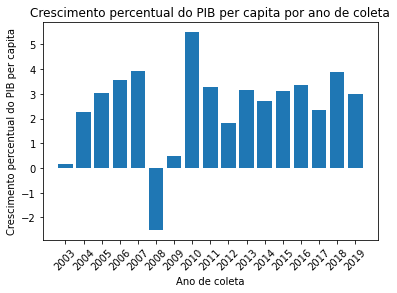

In [47]:
plt.bar(dados_egov['ano_coleta'], dados_egov['pib_cresc_per_capita_%pib'])

# Configurando o título e rótulos dos eixos
plt.title('Crescimento percentual do PIB per capita por ano de coleta')
plt.xlabel('Ano de coleta')
plt.ylabel('Crescimento percentual do PIB per capita')

#definindo a granularidade do eixo X
plt.xticks(dados_egov['ano_coleta'], rotation=45)
# Exibindo o gráfico
plt.show()

### De acordo com o gráfico, o ano em que o país obteve o maior crescimento do PIB per capita foi 2010.

## <font color = "red">2- Qual Ano Teve as Maiores Despesas com Saúde?</font>

In [48]:
# Visualiza os dados
dados_egov.head()

,ano_coleta,despesas_educ_percent,despesas_saude_per_capita,despesas_educ_total,despesas_saude_%pib,receita_trib_%pib,receita_excl_doa_%pib,ibrd_e_ida,pop_cresc_anual%,pib_cresc_per_capita_%pib,pib_deflator,domestic_saude_despesas_%pib,pib_cresc_anual%,pib_cor_us$,despesa_nac_bruta_%pib,pib_moeda_local
0,2003,20.850740,25.437891,24.980090,5.169123,16.876979,21.738908,2.741964e+09,2.709600,0.180864,51.824235,1.488423,2.932476,1.490452e+10,111.732648,1131782000000
1,2004,23.409540,27.526983,26.668150,5.344949,16.876979,21.738908,2.882726e+09,2.720796,2.283178,55.517666,1.416008,5.104300,1.609534e+10,110.347249,1274329000000
2,2005,22.543655,30.960957,27.469340,5.314364,16.876979,21.738908,2.663224e+09,2.739229,3.045012,58.237838,1.482691,5.906666,1.873790e+10,110.429285,1415725000000
3,2006,21.677770,40.938290,25.081400,5.873449,16.876979,21.738908,2.764089e+09,2.757907,3.576204,71.941278,1.458456,6.472494,2.582552e+10,109.212364,1862041000000
4,2007,25.852864,50.321873,23.950048,5.997067,16.876979,21.738908,2.968119e+09,2.768560,3.933078,77.789734,1.556385,6.850730,3.195820e+10,109.941251,2151349000000


In [49]:
#calculo de despesa nacional bruto
#despesa_nacional = (dados_egov['despesa_nac_bruta_%pib'])/100 * dados_egov['pib_moeda_local']
dados_egov['despesa_nacional'] = (dados_egov['despesa_nac_bruta_%pib'])/100 * dados_egov['pib_moeda_local']

In [50]:
#calculo das despesas total com saúde
dados_egov['desp_saude'] = (dados_egov['despesas_saude_%pib'])/100 * dados_egov['despesa_nacional']

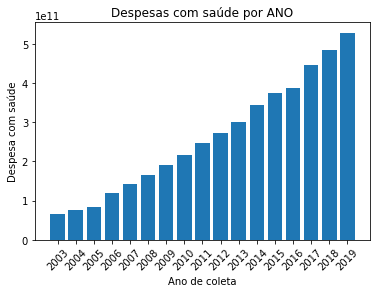

In [51]:
plt.bar(dados_egov['ano_coleta'], dados_egov['desp_saude'])

# Configurando o título e rótulos dos eixos
plt.title('Despesas com saúde por ANO') 
plt.xlabel('Ano de coleta')
plt.ylabel('Despesa com saúde')

#definindo a granularidade do eixo X
plt.xticks(dados_egov['ano_coleta'], rotation=45)
# Exibindo o gráfico
plt.show()

### De acordo com o gráfico, o ano em que o país teve as maiores despesas com saúde foi 2019.

## <font color = "red">3- Qual Ano Teve os Maiores Gastos com Educação?</font>

In [52]:
# Visualiza os dados
dados_egov.head()

,ano_coleta,despesas_educ_percent,despesas_saude_per_capita,despesas_educ_total,despesas_saude_%pib,receita_trib_%pib,receita_excl_doa_%pib,ibrd_e_ida,pop_cresc_anual%,pib_cresc_per_capita_%pib,pib_deflator,domestic_saude_despesas_%pib,pib_cresc_anual%,pib_cor_us$,despesa_nac_bruta_%pib,pib_moeda_local,despesa_nacional,desp_saude
0,2003,20.850740,25.437891,24.980090,5.169123,16.876979,21.738908,2.741964e+09,2.709600,0.180864,51.824235,1.488423,2.932476,1.490452e+10,111.732648,1131782000000,1.264570e+12,6.536718e+10
1,2004,23.409540,27.526983,26.668150,5.344949,16.876979,21.738908,2.882726e+09,2.720796,2.283178,55.517666,1.416008,5.104300,1.609534e+10,110.347249,1274329000000,1.406187e+12,7.515998e+10
2,2005,22.543655,30.960957,27.469340,5.314364,16.876979,21.738908,2.663224e+09,2.739229,3.045012,58.237838,1.482691,5.906666,1.873790e+10,110.429285,1415725000000,1.563375e+12,8.308344e+10
3,2006,21.677770,40.938290,25.081400,5.873449,16.876979,21.738908,2.764089e+09,2.757907,3.576204,71.941278,1.458456,6.472494,2.582552e+10,109.212364,1862041000000,2.033579e+12,1.194412e+11
4,2007,25.852864,50.321873,23.950048,5.997067,16.876979,21.738908,2.968119e+09,2.768560,3.933078,77.789734,1.556385,6.850730,3.195820e+10,109.941251,2151349000000,2.365220e+12,1.418438e+11


In [53]:
#calculo das despesas total com saúde
dados_egov['desp_educacao'] = (dados_egov['despesas_educ_total'])/100 * dados_egov['despesa_nacional']

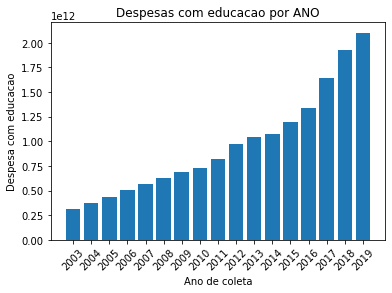

In [54]:
plt.bar(dados_egov['ano_coleta'], dados_egov['desp_educacao'])

# Configurando o título e rótulos dos eixos
plt.title('Despesas com educacao por ANO') 
plt.xlabel('Ano de coleta')
plt.ylabel('Despesa com educacao')

#definindo a granularidade do eixo X
plt.xticks(dados_egov['ano_coleta'], rotation=45)
# Exibindo o gráfico
plt.show()

De acordo com o gráfico, o ano em que o pais teve os maiores gastos com educalçao foi em 2019

## <font color = "red">4- Como a Receita do Governo se Correlaciona com a Despesa do Governo?</font>

In [55]:
# Visualiza os dados
dados_egov.head()

,ano_coleta,despesas_educ_percent,despesas_saude_per_capita,despesas_educ_total,despesas_saude_%pib,receita_trib_%pib,receita_excl_doa_%pib,ibrd_e_ida,pop_cresc_anual%,pib_cresc_per_capita_%pib,pib_deflator,domestic_saude_despesas_%pib,pib_cresc_anual%,pib_cor_us$,despesa_nac_bruta_%pib,pib_moeda_local,despesa_nacional,desp_saude,desp_educacao
0,2003,20.850740,25.437891,24.980090,5.169123,16.876979,21.738908,2.741964e+09,2.709600,0.180864,51.824235,1.488423,2.932476,1.490452e+10,111.732648,1131782000000,1.264570e+12,6.536718e+10,3.158907e+11
1,2004,23.409540,27.526983,26.668150,5.344949,16.876979,21.738908,2.882726e+09,2.720796,2.283178,55.517666,1.416008,5.104300,1.609534e+10,110.347249,1274329000000,1.406187e+12,7.515998e+10,3.750041e+11
2,2005,22.543655,30.960957,27.469340,5.314364,16.876979,21.738908,2.663224e+09,2.739229,3.045012,58.237838,1.482691,5.906666,1.873790e+10,110.429285,1415725000000,1.563375e+12,8.308344e+10,4.294488e+11
3,2006,21.677770,40.938290,25.081400,5.873449,16.876979,21.738908,2.764089e+09,2.757907,3.576204,71.941278,1.458456,6.472494,2.582552e+10,109.212364,1862041000000,2.033579e+12,1.194412e+11,5.100501e+11
4,2007,25.852864,50.321873,23.950048,5.997067,16.876979,21.738908,2.968119e+09,2.768560,3.933078,77.789734,1.556385,6.850730,3.195820e+10,109.941251,2151349000000,2.365220e+12,1.418438e+11,5.664713e+11


<Axes: >

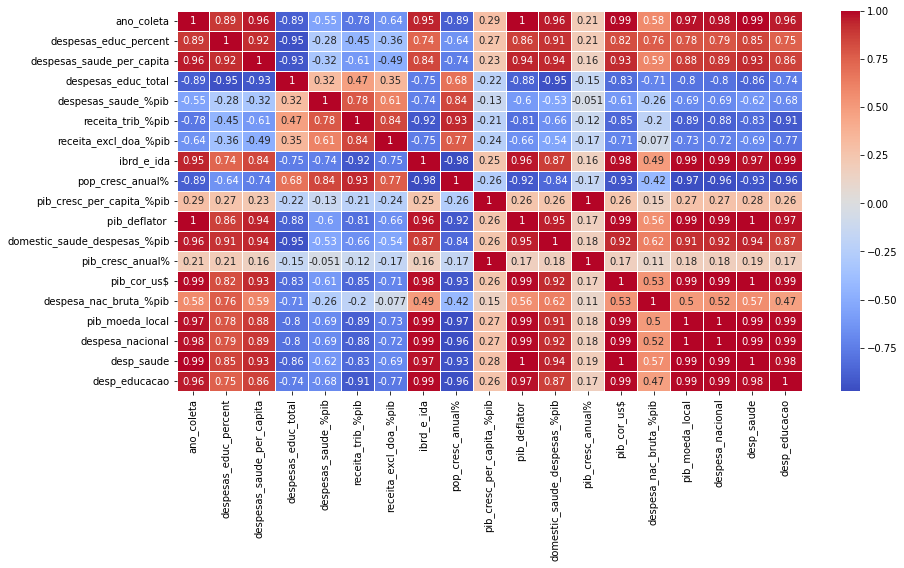

In [56]:
#calculando correlação entre os atributos
corr_matrix = dados_egov.corr()

#plotando mapa de calor no qual ilustra a correlação entre todos os atributos
plt.figure(figsize = (14,7))
sb.heatmap(corr_matrix, annot=True, cmap='coolwarm',linewidths=0.9)

Tendo em vista a matriz de correlação apresentada, podemos inferir:

*Receita de impostos*:
*   Despesas com saúde(despesas_saude_%pib) apresentam forte correlação positiva com receita tributária do governo(receita_trib_%pib), o que as tornam diretamente proporcionais. [+0,78]
*   Despesas com educação(despesas_educ_total) apresentam forte correlação positiva com receita tributária do governo(receita_trib_%pib), o que também a tornam diretamente proporcionais.[+0,47]
*   **A primeira correlação se apresenta mais forte, o que indica que esta possui uma relação linear mais intensa entre as duas variáveis que a segunda.**




*Receita de Empréstimos do BIRD e Créditos AID*


*   Despesas com saúde(despesas_saude_%pib) apresentam forte correlação negativa com os Empréstimos do BIRD e Créditos AID(ibrd_e_ida), o que as tornam inversamente proporcionais.[-0,74]
*   Despesas com educação(despesas_educ_total) apresentam forte correlação negativa com os Empréstimos do BIRD e Créditos AID(ibrd_e_ida), o que as tornam inversamente proporcionais.[-0,75]







## <font color = "red">5- Como os Gastos do Governo com Educação e Saúde Afetam o Crescimento do PIB?</font>

Ainda segundo a matriz de correlação, podemos tirar algumas conclusões.



*   Ao analisarmos a correlação do indicador Despesas com educação(despesas_educ_total) com o crescimento do PIB per capita(pib_cresc_per_capita_%pib), pode-se inferir que a correlação é negativa no valor de -0,22, o que torna o relacionamento entre essas variaveis não muito forte.
*   Já quando analisamos as variáveis despesas com saúde(despesas_saude_%pib) com o crescimento do PIB per capita(pib_cresc_per_capita_%pib) podemos observar uma correlação negativa no valor de -0,13, valor bem proximo da origem(0) que nos informa que há fraca correlação negativa entre as variáveis. Provavelmente isso deve-se ao fato dos menores gastos gerais com saúde, como por exemplo medicamentos que se tornaram mais baratos e ao baixo salário dos profissionais de saúde da rede publica que ficaram defasados com relação à inflação.



## <font color = "red">6- Como os Gastos do Governo com Educação e Saúde Afetam o Crescimento do PIB?</font>

In [57]:
dados_egov.head()

,ano_coleta,despesas_educ_percent,despesas_saude_per_capita,despesas_educ_total,despesas_saude_%pib,receita_trib_%pib,receita_excl_doa_%pib,ibrd_e_ida,pop_cresc_anual%,pib_cresc_per_capita_%pib,pib_deflator,domestic_saude_despesas_%pib,pib_cresc_anual%,pib_cor_us$,despesa_nac_bruta_%pib,pib_moeda_local,despesa_nacional,desp_saude,desp_educacao
0,2003,20.850740,25.437891,24.980090,5.169123,16.876979,21.738908,2.741964e+09,2.709600,0.180864,51.824235,1.488423,2.932476,1.490452e+10,111.732648,1131782000000,1.264570e+12,6.536718e+10,3.158907e+11
1,2004,23.409540,27.526983,26.668150,5.344949,16.876979,21.738908,2.882726e+09,2.720796,2.283178,55.517666,1.416008,5.104300,1.609534e+10,110.347249,1274329000000,1.406187e+12,7.515998e+10,3.750041e+11
2,2005,22.543655,30.960957,27.469340,5.314364,16.876979,21.738908,2.663224e+09,2.739229,3.045012,58.237838,1.482691,5.906666,1.873790e+10,110.429285,1415725000000,1.563375e+12,8.308344e+10,4.294488e+11
3,2006,21.677770,40.938290,25.081400,5.873449,16.876979,21.738908,2.764089e+09,2.757907,3.576204,71.941278,1.458456,6.472494,2.582552e+10,109.212364,1862041000000,2.033579e+12,1.194412e+11,5.100501e+11
4,2007,25.852864,50.321873,23.950048,5.997067,16.876979,21.738908,2.968119e+09,2.768560,3.933078,77.789734,1.556385,6.850730,3.195820e+10,109.941251,2151349000000,2.365220e+12,1.418438e+11,5.664713e+11


In [58]:
#definição da variável que totaliza os gastos com educação com os gastos com saúde
dados_egov['gasto_educ+saud'] = dados_egov['desp_saude'] + dados_egov['pib_cresc_anual%']

In [59]:
#calculando a correlação entre o gasto total com educação e saúde com o crescimento do pib anual
corr = dados_egov['gasto_educ+saud'].corr(dados_egov['pib_cresc_anual%'])
print(corr)

0.18970469371245732


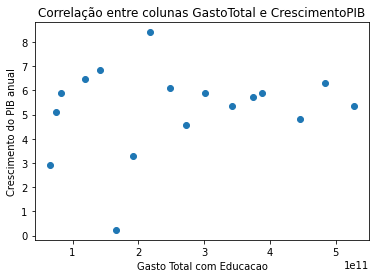

In [60]:
#verificando visualmente a correlação entre as variáveis
plt.scatter(dados_egov['gasto_educ+saud'], dados_egov['pib_cresc_anual%'])
plt.xlabel('Gasto Total com Educacao')
plt.ylabel('Crescimento do PIB anual')
plt.title('Correlação entre colunas GastoTotal e CrescimentoPIB')

plt.show()

Agora, iremos utilizar um modelo de regressão linear para analisar a relação das variáveis abordadas anteriormente; Gasto total com educação(variável independente) e Crescimento do PIB anual (variável dependente).



In [61]:
#seguimentando as variáveis dependentes e independentes 
x = pd.DataFrame(dados_egov['gasto_educ+saud'])
y = pd.DataFrame(dados_egov['pib_cresc_anual%'])

#construção do modeo
model = LinearRegression()
model.fit(x,y)

LinearRegression()

In [62]:
model.coef_

array([[2.32876005e-12]])

- A primeira falsa intuição que temos é de achar que a correlação e coeficienciente do modelo linear são a mesma coisa, o que não são. 
- A correlação é uma medida estatística que indica o grau de associação linear entre duas variáveis. Ela varia entre -1 e 1, onde -1 indica uma relação negativa perfeita (ou inversa), 0 indica ausência de correlação e 1 indica uma relação positiva perfeita. ***A correlação não depende da escolha de uma variável como independente e outra como dependente, ou seja, é `simétrica`.***
- Já o coeficiente em um modelo de regressão linear é uma medida de inclinação da reta (ou plano) que melhor descreve a relação entre uma variável dependente e uma ou mais variáveis independentes. O coeficiente pode ser positivo ou negativo, indicando uma relação direta ou inversa, respectivamente, entre as variáveis. ***Ele não é `simétrico` e depende da escolha de uma variável como dependente e outra ou outras como independentes.***

A partir do valor obtido do coeficiente do modelo de regressão linear podemos inferir que para cada valor unitário gasto com saúde e educação, a um aumento de `2.32876005e-12` no **crescimento** do PIB nacional por ano.

## <font color = "red">7- Com Base na Análise Quais São as Recomendações aos Governantes e Gestores?</font>

- Investir em educação: Os gastos com educação são uma medida importante para avaliar o compromisso do governo com o desenvolvimento humano. É importante que o governo invista em educação para melhorar sua qualidade e garantir que todos tenham acesso a uma educação de qualidade. A longo prazo o investimento em educação é um importante alavancador do PIB.

- Investir em saúde: Os gastos com saúde são importantes para garantir o acesso da população aos serviços de saúde necessários. O governo pode investir em infraestrutura, equipamentos e recursos humanos para melhorar a qualidade dos serviços de saúde e garantir que todos tenham acesso a cuidados médicos de qualidade.

- Estimular o crescimento do PIB: O crescimento do PIB é uma medida importante para avaliar o desempenho econômico do país. O governo pode implementar políticas para estimular o crescimento econômico, como incentivar o investimento estrangeiro, apoiar o empreendedorismo e promover o comércio internacional.

- Focar no crescimento do PIB per capita: O crescimento do PIB per capita é uma medida importante para avaliar a prosperidade do país e a qualidade de vida da população. O governo pode implementar políticas para aumentar a produtividade, apoiar o crescimento da indústria e do comércio, e reduzir as desigualdades econômicas.

- Promover a estabilidade econômica: A estabilidade econômica é importante para manter a confiança dos investidores e garantir a segurança financeira da população. O governo pode implementar políticas para reduzir a inflação, controlar a dívida pública e manter um ambiente econômico estável e previsível.